<a href="https://colab.research.google.com/github/Taaniya/vector-algebra-for-nlp/blob/main/Exploring_word_embeddings_and_cosine_similarity_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install transformers

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import math
import torch

import pandas as pd
from matplotlib import pyplot as plt
from transformers import AutoTokenizer, AutoModel

[This article](https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity) explains the intuition behind the 2 ways for computing distance between 2 vectors - Euclidean and Cosine

Let's see the results with cosine similarity in practice with a few dummy vectors with 2 dimensions.


In [34]:
# vectors which are scaled version of each other. Ratio of components of 2 vectors for
# each dimensions is same.
# vector A - 2i + 4j
# vector B - 10i + 20j
# ratio of dim1 = 10/2 = 5
# ratio of dim2 = 20/4 = 5

# Notice the difference in ratio of components in the 2 dimensions is 0

vector1 = np.array([2, 4])
vector2 = np.array([10, 20])

In [35]:
# Ratio of vector components for each dimension
vector1 / vector2

array([0.2, 0.2])

In [36]:
dot_product = np.dot(vector1, vector2)
print(f"dot product: {dot_product}")

norm_vector1 = np.linalg.norm(vector1)

norm_vector2 = np.linalg.norm(vector2)

print(f"norm / magnitude of v1: {norm_vector1}, norm / magnitude of v2: {norm_vector2}")

cos_similarity = dot_product / (norm_vector1 * norm_vector2)
print("Cosine Similarity:", cos_similarity)

dot product: 100
norm / magnitude of v1: 4.47213595499958, norm / magnitude of v2: 22.360679774997898
Cosine Similarity: 0.9999999999999999


Each dimension of a word vector represents a word sense within it. For e.g., BERT, represents its word vectors' semantics in 768 dimensions.

The way to interpret high cosine similarity between 2 word vectors is that the 2 words incorporate the same semantics in the same amount of proportion within themselves. However, the semantics of a words can be a scaled amount as of the other word.
E.g., in above 2 vectors, the proportion of semantics in each word is 1:2

In [37]:
# vectors which are approximately scaled version of each other
# vector A - 2i + 4j
# vector B - 4i + 4j
# ratio of dim1 = 4/2 = 2
# ratio of dim2 = 4/4 = 1
# Notice the difference in ratio of magnitudes in the 2 dimensions is again low (1), but not 0

vector1 = np.array([2, 4])
vector2 = np.array([8, 4])

dot_product = np.dot(vector1, vector2)
print(f"dot product: {dot_product}")

norm_vector1 = np.linalg.norm(vector1)

norm_vector2 = np.linalg.norm(vector2)

print(f"norm v1: {norm_vector1}, norm v2: {norm_vector2}")

cos_similarity = dot_product / (norm_vector1 * norm_vector2)
print("Cosine Similarity:", cos_similarity)

dot product: 32
norm v1: 4.47213595499958, norm v2: 8.94427190999916
Cosine Similarity: 0.7999999999999998


In [38]:
vector1 / vector2

array([0.25, 1.  ])

In [39]:
# vectors which are not scaled version of each other
# vectors which are approximately scaled version of each other
# vector A - 2i + 4j
# vector B - 100i + 4j
# ratio of dim1 = 100/2 = 50
# ratio of dim2 = 4/4 = 1
# Notice the difference in ratio of magnitudes in the 2 dimensions is very high (49)


vector1 = np.array([2, 4])
vector2 = np.array([100, 4])

dot_product = np.dot(vector1, vector2)
print(f"dot product: {dot_product}")

norm_vector1 = np.linalg.norm(vector1)

norm_vector2 = np.linalg.norm(vector2)

print(f"norm v1: {norm_vector1}, norm v2: {norm_vector2}")

cos_similarity = dot_product / (norm_vector1 * norm_vector2)
print("Cosine Similarity:", cos_similarity)

dot product: 216
norm v1: 4.47213595499958, norm v2: 100.07996802557443
Cosine Similarity: 0.4826047536471346


In [40]:
vector1 / vector2

array([0.02, 1.  ])

Let's observe the same for real word embeddings learnt by BERT uncased model

In [41]:
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert_model = AutoModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Exploring vector embeddings for synonyms
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 2502, 5909,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 2312, 3392,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}
Token IDs for words - big & large: [2502, 2312]
Cosine similarity: [[0.76162577]]


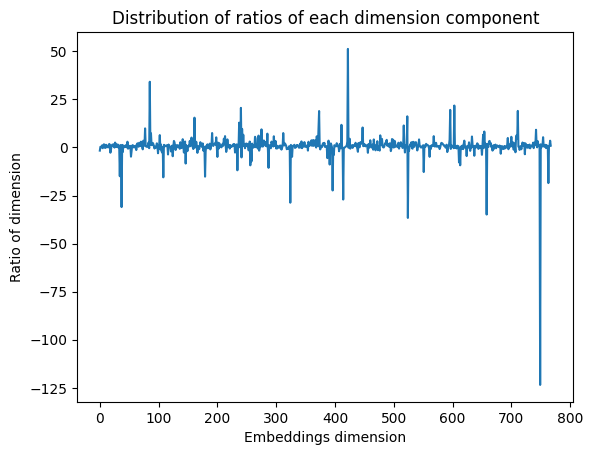

In [64]:
# Exploring embeddings of synonyms - big & large
text1 = "This is a big fruit"
text2 = "This is a large tree"

encoded_input1 = bert_tokenizer(text1, padding=True, truncation=True, return_tensors='pt')
encoded_input2 = bert_tokenizer(text2, padding=True, truncation=True, return_tensors='pt')

print("Exploring vector embeddings for synonyms")
print(encoded_input1)
print(encoded_input2)

print(f"Token IDs for words - big & large: {bert_tokenizer.convert_tokens_to_ids(['big', 'large'])}")

# Compute token embeddings

with torch.no_grad():
    model_output1 = bert_model(**encoded_input1)
    model_output2 = bert_model(**encoded_input2)

# Since 1st and last tokens are [CLS] & [SEP] tokens, picking the embeddings of tokens big & large
text1_embeddings = model_output1['last_hidden_state'][0][4]
text2_embeddings = model_output2['last_hidden_state'][0][4]

text1_embeddings = text1_embeddings.reshape(1, -1)
text2_embeddings = text2_embeddings.reshape(1, -1)

print(f"Cosine similarity: {cosine_similarity(text1_embeddings, text2_embeddings)}")

dim_ratios = text1_embeddings / text2_embeddings

# plot distribution of ratios of each dimension component
plt.title("Distribution of ratios of each dimension component")
plt.xlabel("Embeddings dimension")
plt.ylabel("Ratio of dimension")
plt.plot(dim_ratios[0].numpy())
plt.show()

In [65]:
# Descriptive stats for this distribution

pd.DataFrame(dim_ratios[0].numpy()).describe()

,0
count,768.000000
mean,0.602755
std,6.497367
min,-123.472862
25%,0.031481
50%,0.715712
75%,1.438297
max,51.206287


Exploring vector embeddings for unrelated tokens
{'input_ids': tensor([[  101,  2054,  4785,  2003,  7218,  2005,  2023, 10416,  1029,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[ 101, 2202, 1037, 3242, 1998, 4133, 2091,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
Token IDs for words - climate & chair: [4785, 3242]
Cosine similarity: [[0.28127345]]


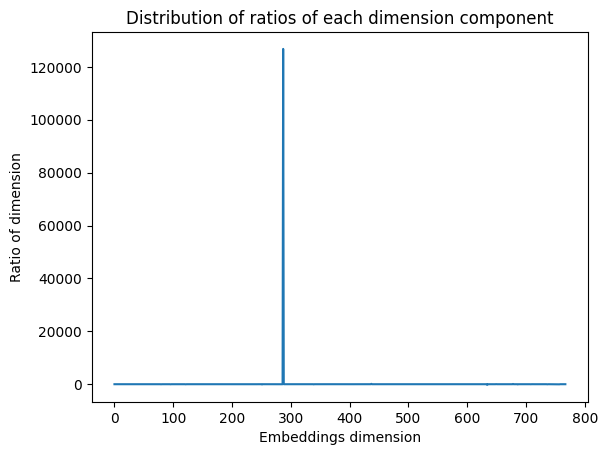

In [60]:
# Exploring embeddings of 2 unrelated tokens - climate & chair

text1 = "What climate is suitable for this crop ?"
text2 = "Take a chair and sit down"
encoded_input1 = bert_tokenizer(text1, padding=True, truncation=True, return_tensors='pt')
encoded_input2 = bert_tokenizer(text2, padding=True, truncation=True, return_tensors='pt')

print("Exploring vector embeddings for unrelated tokens")
print(encoded_input1)
print(encoded_input2)

print(f"Token IDs for words - climate & chair: {bert_tokenizer.convert_tokens_to_ids(['climate', 'chair'])}")

# Compute token embeddings

with torch.no_grad():
    model_output1 = bert_model(**encoded_input1)
    model_output2 = bert_model(**encoded_input2)

# Since 1st and 3rd tokens are [CLS] & [SEP] tokens, pick embeddings of 2nd token
text1_embeddings = model_output1['last_hidden_state'][0][2]
text2_embeddings = model_output2['last_hidden_state'][0][3]

text1_embeddings = text1_embeddings.reshape(1, -1)
text2_embeddings = text2_embeddings.reshape(1, -1)

print(f"Cosine similarity: {cosine_similarity(text1_embeddings, text2_embeddings)}")

dim_ratios = text1_embeddings / text2_embeddings

# plot distribution of ratios of each dimension component
plt.title("Distribution of ratios of each dimension component")
plt.xlabel("Embeddings dimension")
plt.ylabel("Ratio of dimension")
plt.plot(dim_ratios[0].numpy())
plt.show()

In [62]:
# Descriptive stats for this distribution

pd.DataFrame(dim_ratios[0].numpy()).describe()

,0
count,768.000000
mean,164.631546
std,4574.845703
min,-266.819580
25%,-0.668978
50%,0.195000
75%,0.973573
max,126780.789062


The min and max for this distribution is too extreme as compared to the distribution of the same ratio for two synonyms in the previous plot.
This indicates there atleast 2 dimensions where the components of the vectors have extremely different values i.e. the 2 vectors are very dissimilar in those senses / dimensions.

#### References
* https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity
* [Vector Algebra for Natural Language Processing](https://towardsdatascience.com/from-linear-algebra-to-text-representation-for-natural-language-processing-239cd3ccb12f)